<a href="https://colab.research.google.com/github/jeanraisa/CancerScope-Diagnosis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import of necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

**Loading Data**

In [2]:
# Load the dataset
file_path = "The_Cancer_data_1500_V2.csv"
data = pd.read_csv(file_path)

In [3]:
# Display basic information about the datase
print(data.shape)
print(data.head())
data.info()
data.describe()

(1500, 9)
   Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI   

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [4]:
# Check for missing values in the dataset
data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


**Look at the distribution of Non-cancers and Cancers and count of it**

In [5]:
#  values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.
data['Diagnosis'].value_counts()

,count
Diagnosis,
0,943
1,557


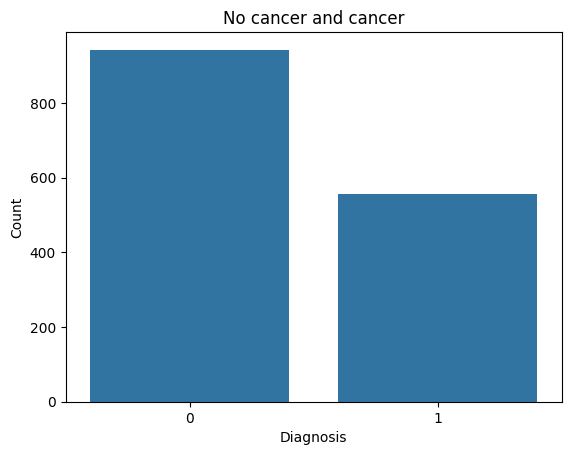

In [6]:
# Visualize No cancer and cancer cases
sns.countplot(x='Diagnosis', data=data)
plt.title('No cancer and cancer')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

**General overview of the data distribution and outliers**

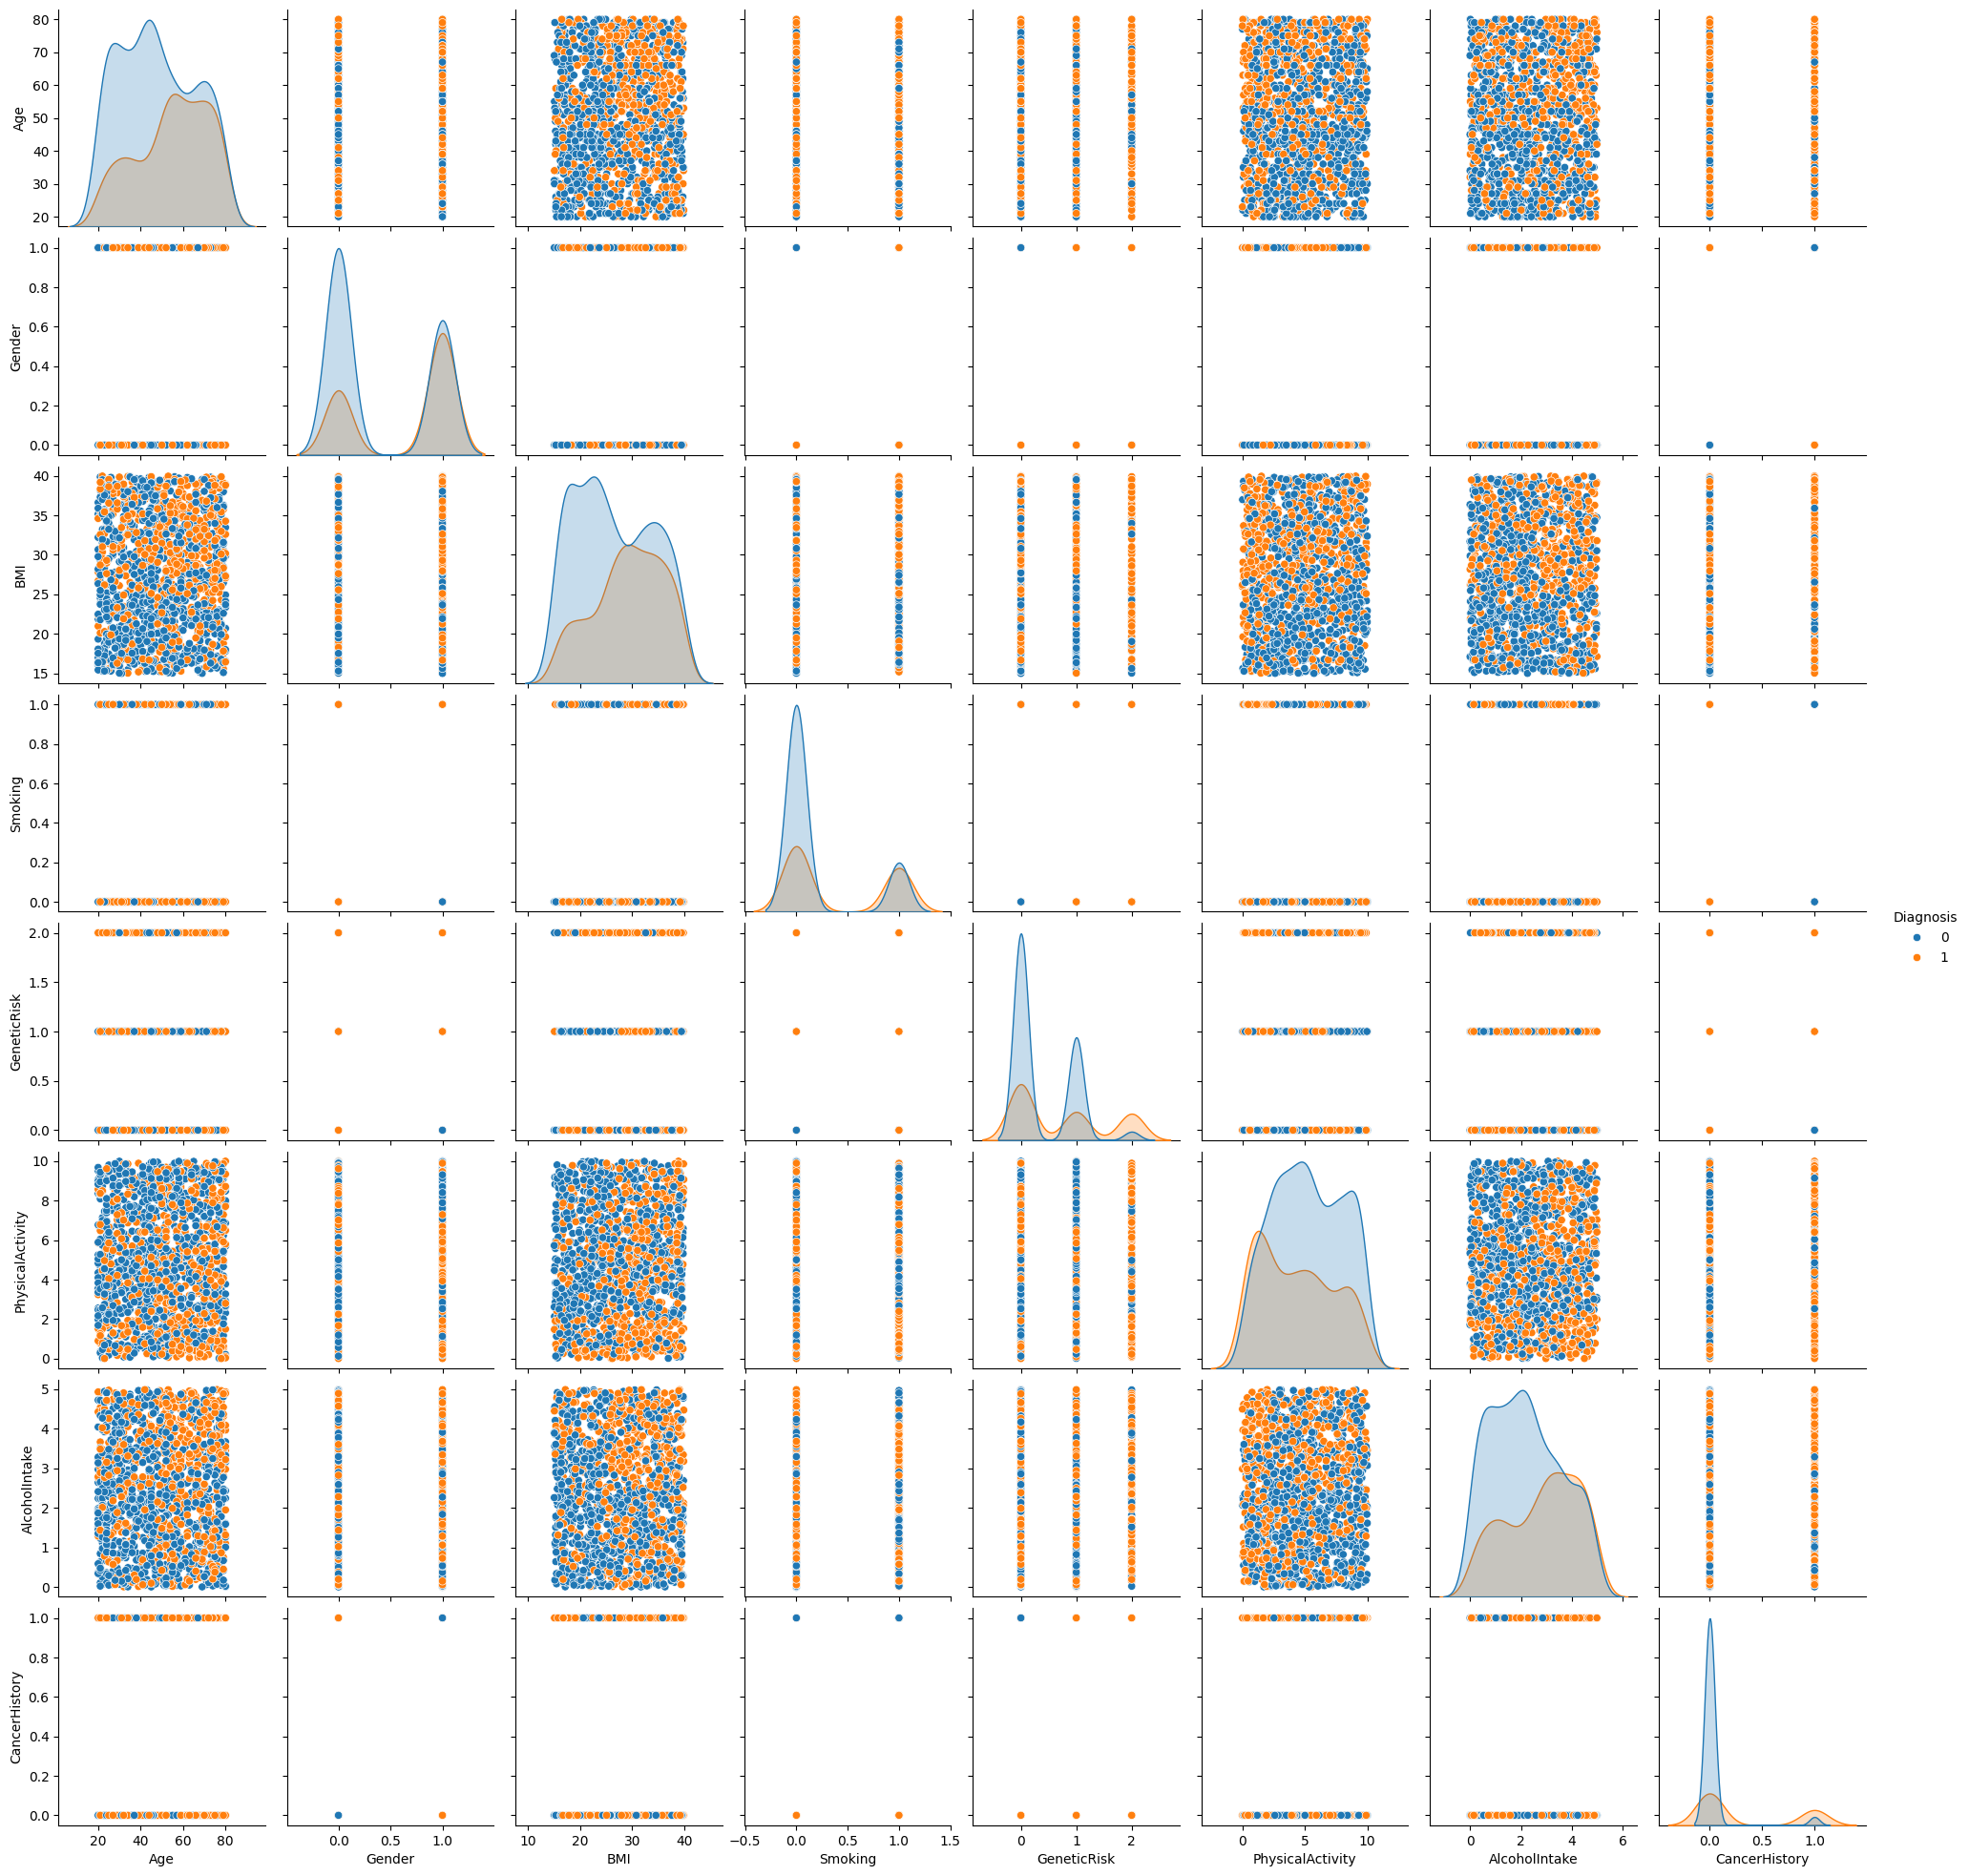

In [7]:
sns.pairplot(data.iloc[:,:], hue = "Diagnosis");
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

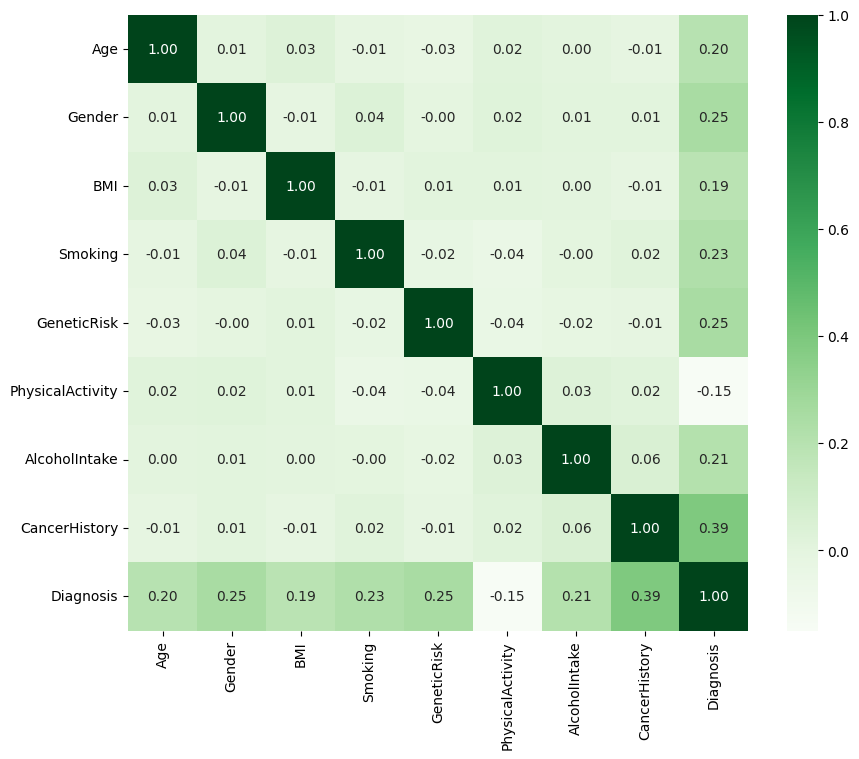

In [8]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.show

**Feature Engineering and Data Splitting**

In [9]:
# Define features (X) and target (Y)
X = data.drop(columns=['Diagnosis'])
Y = data['Diagnosis']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

**Simple  Model Without Optimization**

In [10]:
# Define the model
model = Sequential()

#input layer
model.add(Dense(64, activation= 'relu', input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate=0.001))

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Loss: {test_loss}")
print(f"Accuracy: {test_accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6292 - loss: 0.6836 - val_accuracy: 0.6458 - val_loss: 0.6809
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6408 - loss: 0.6805 - val_accuracy: 0.6458 - val_loss: 0.6803
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6359 - loss: 0.6806 - val_accuracy: 0.6458 - val_loss: 0.6796
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6156 - loss: 0.6851 - val_accuracy: 0.6458 - val_loss: 0.6790
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6440 - loss: 0.6779 - val_accuracy: 0.6458 - val_loss: 0.6783
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6273 - loss: 0.6824 - val_accuracy: 0.6458 - val_loss: 0.6776
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6419 - loss: 0.6766 - val_accuracy: 0.6458 - val_loss: 0.6770
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6292 - loss: 0.6795 - val_accuracy: 0.6458 - 

In [11]:
# Model Saving
import os


if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# Now save your model
model.save("saved_models/model1.keras")


Final Training Accuracy: 71.98%
Final Validation Accuracy: 75.00%


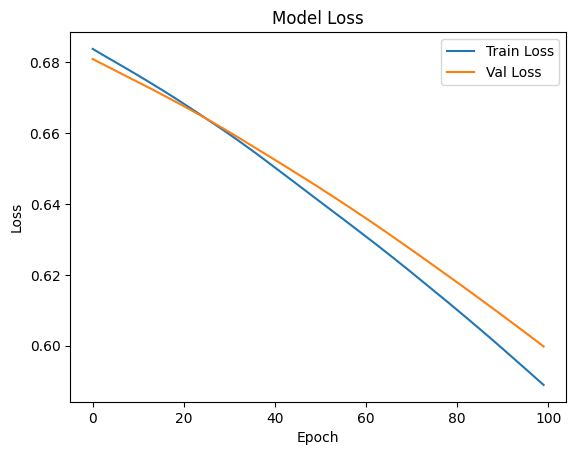

In [45]:
# Print the final training and validation accuracy in percentage
final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100
print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")


# Plot Training and validation loss values
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

   No cancer       0.69      1.00      0.82       184
      Cancer       1.00      0.28      0.44       116

    accuracy                           0.72       300
   macro avg       0.84      0.64      0.63       300
weighted avg       0.81      0.72      0.67       300


Model Performance Metrics:
Accuracy: 0.7233
Precision: 1.0000
F1 Score: 0.4430


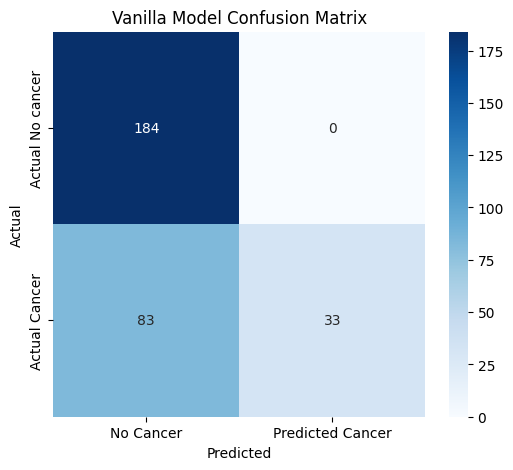

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, classification_report,  recall_score, f1_score

y_pred_model = model.predict(X_test)
y_pred_classes_model = (y_pred_model > 0.5).astype(int)
# Generate the confusion matrix and classification report
cm_simple = confusion_matrix(y_test, y_pred_classes_model)

print(classification_report(y_test, y_pred_classes_model, target_names=['No cancer', 'Cancer']))

# Calculate additional metrics: Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred_classes_model)
precision = precision_score(y_test, y_pred_classes_model)
recall = recall_score(y_test, y_pred_classes_model)
f1 = f1_score(y_test, y_pred_classes_model)

# Print the calculated metrics
print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_simple, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Predicted Cancer'],
            yticklabels=['Actual No cancer', 'Actual Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Vanilla Model Confusion Matrix')
plt.show()


**Optimized  Model with Optimization Techniques**

* L2 Regularization
* Batch Normalization
* Dropout
* Early Stopping
* RMSprop Optimizer

In [13]:
from keras.layers import BatchNormalization


# L2 Regularized Model
model2 = Sequential()

# Input Layer
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())

# Hidden Layers
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model2.add(Dropout(0.2))

model2.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model2.add(Dropout(0.2))

model2.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model2.add(Dropout(0.2))

# Output Layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer and binary cross-entropy loss
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model2
model2_history= model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping], verbose=2)

# Evaluate model2
model_loss, model_accuracy = model2.evaluate(X_test, y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/100
30/30 - 2s - 57ms/step - accuracy: 0.5698 - loss: 0.6941 - val_accuracy: 0.7000 - val_loss: 0.6862
Epoch 2/100
30/30 - 0s - 13ms/step - accuracy: 0.6635 - loss: 0.6803 - val_accuracy: 0.7167 - val_loss: 0.6653
Epoch 3/100
30/30 - 0s - 4ms/step - accuracy: 0.6865 - loss: 0.6582 - val_accuracy: 0.7458 - val_loss: 0.6366
Epoch 4/100
30/30 - 0s - 5ms/step - accuracy: 0.7052 - loss: 0.6235 - val_accuracy: 0.7667 - val_loss: 0.5978
Epoch 5/100
30/30 - 0s - 4ms/step - accuracy: 0.7073 - loss: 0.5960 - val_accuracy: 0.7792 - val_loss: 0.5625
Epoch 6/100
30/30 - 0s - 4ms/step - accuracy: 0.7323 - loss: 0.5707 - val_accuracy: 0.7833 - val_loss: 0.5369
Epoch 7/100
30/30 - 0s - 3ms/step - accuracy: 0.7458 - loss: 0.5366 - val_accuracy: 0.7917 - val_loss: 0.5121
Epoch 8/100
30/30 - 0s - 3ms/step - accuracy: 0.7688 - loss: 0.5090 - val_accuracy: 0.7958 - val_loss: 0.4890
Epoch 9/100
30/30 - 0s - 5ms/step - accuracy: 0.7677 - loss: 0.5037 - val_accuracy: 0.8042 - val_loss: 0.4820
Epoch 10

In [14]:
# Now save your model
model2.save("saved_models/model2.keras")


Final Training Accuracy: 90.31%
Final Validation Accuracy: 87.92%


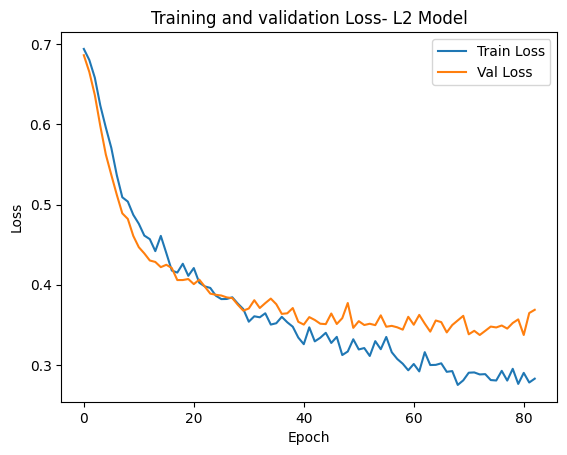

In [47]:
# Print the final training and validation accuracy in percentage
final_train_accuracy = model2_history.history['accuracy'][-1] * 100
final_val_accuracy = model2_history.history['val_accuracy'][-1] * 100
print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")


# Plot Training and validation loss values
plt.plot(model2_history.history['loss'], label="Train Loss")
plt.plot(model2_history.history['val_loss'], label="Val Loss")
plt.title("Training and validation Loss- L2 Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

**Prediction on Test Dataset for optimized model( L2 Regularized Model)**

In [41]:
from keras.models import load_model
# Load the optimized model from the saved directory
model_path = 'saved_models/model2.keras'
optimized_model = load_model(model_path)

# Step 1: Make predictions on the test set using the optimized model
y_pred_prob_optimized = optimized_model.predict(X_test)

# Step 2: Convert probabilities to binary labels (assuming binary classification, threshold = 0.5)
y_pred_classes_optimized = (y_pred_prob_optimized > 0.5).astype(int)

# Step 3: Print some example predictions
num_examples = 10  # Adjust this number to print more/less examples

print("Example Predictions (Optimized Model):")
for i in range(num_examples):
    print(f"Test Sample {i + 1}:")
    print(f"Predicted Probability: {y_pred_prob_optimized[i][0]:.4f}")
    print(f"Predicted Class: {y_pred_classes_optimized[i][0]}")
    print("-" * 40)  # Separator between examples

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Example Predictions (Optimized Model):
Test Sample 1:
Predicted Probability: 0.9883
Predicted Class: 1
----------------------------------------
Test Sample 2:
Predicted Probability: 0.9944
Predicted Class: 1
----------------------------------------
Test Sample 3:
Predicted Probability: 0.0160
Predicted Class: 0
----------------------------------------
Test Sample 4:
Predicted Probability: 0.0190
Predicted Class: 0
----------------------------------------
Test Sample 5:
Predicted Probability: 0.0240
Predicted Class: 0
----------------------------------------
Test Sample 6:
Predicted Probability: 0.0285
Predicted Class: 0
----------------------------------------
Test Sample 7:
Predicted Probability: 0.0345
Predicted Class: 0
----------------------------------------
Test Sample 8:
Predicted Probability: 0.0736
Predicted Class: 0
----------------------------------------
Test Sample 9:
Predicted Probability: 0.0500
Predicted Class: 0
-----------------

let's perform an error analysis by comparing the performance of model Vanilla and model2 L2 Regularized based on the provided evaluation code.

Steps:
* Obtain Predictions:
* Convert Predictions to Classes:

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred_model = model.predict(X_test)  # Predictions from Vanilla model
y_pred_model2 = model2.predict(X_test) # Predictions from L2 Regularized model

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [17]:
y_pred_classes_model = (y_pred_model > 0.5).astype(int)  # Threshold for binary classification
y_pred_classes_model2 = (y_pred_model2 > 0.5).astype(int)

In [18]:
from sklearn.metrics import confusion_matrix

cm_model = confusion_matrix(y_test, y_pred_classes_model)
cm_model2 = confusion_matrix(y_test, y_pred_classes_model2)

print("Confusion Matrix - Vanilla Model:\n", cm_model)
print("Confusion Matrix - L2 Regularized Model:\n", cm_model2)

Confusion Matrix - Vanilla Model:
 [[184   0]
 [ 83  33]]
Confusion Matrix - L2 Regularized Model:
 [[171  13]
 [ 24  92]]


Analyze Confusion Matrices:

* True Negatives (TN): Correctly predicted negative cases.
* True Positives (TP): Correctly predicted positive cases.
* False Positives (FP): Incorrectly predicted positive cases (Type I error).
* False Negatives (FN): Incorrectly predicted negative cases (Type II error).
* False Negatives (FN): Incorrectly predicted negative cases (Type II error).

**Error Analysis for L2 Regularized Model**

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

   No cancer       0.88      0.93      0.90       184
      Cancer       0.88      0.79      0.83       116

    accuracy                           0.88       300
   macro avg       0.88      0.86      0.87       300
weighted avg       0.88      0.88      0.88       300



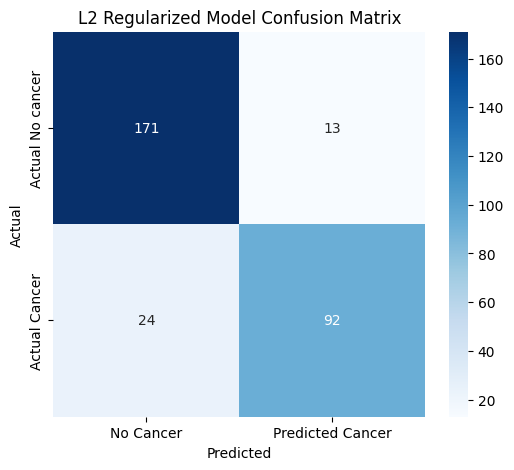

In [33]:
y_pred_model2 = model2.predict(X_test)
y_pred_classes_model2 = (y_pred_model2 > 0.5).astype(int)
# Generate the confusion matrix and classification report
cm_optimized = confusion_matrix(y_test, y_pred_classes_model2)
print(classification_report(y_test, y_pred_classes_model2, target_names=['No cancer', 'Cancer']))

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Predicted Cancer'],
            yticklabels=['Actual No cancer', 'Actual Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('L2 Regularized Model Confusion Matrix')
plt.show()

**Machine learning  for Cancer Detection**

This project aimed to develop a machine learning model for cancer detection with the aim of improving cancer diagnosis accuracy. Two models were implemented which are Optimized model with optimized techniques and Simple model without optimization.

The performance analysis of the two models—Vanilla and Optimized—reveals significant differences in their effectiveness in predicting cancer outcomes. The Optimized model achieved an accuracy of 87% with a loss of 0.301, indicating strong predictive capabilities and efficient learning. In contrast, the Vanilla model demonstrated a lower accuracy of 75% and a higher loss of 0.61, suggesting it struggles more with accurate classification.

**Conclusion**

This work on cancer detection highlights the advancements achieved through machine learning models. The study compares the Vanilla and Optimized models, revealing that the Optimized model significantly outperformed the Vanilla model with an accuracy of 87%. Techniques like L2 regularization, dropout, and batch normalization enhanced predictive performance while reducing false positives and negatives.Overall, this research showcases the potential of machine learning to improve diagnostic accuracy in healthcare, suggesting that further exploration of advanced techniques could lead to even better outcomes.


